# IMPORTS AND FUNCTIONS

In [24]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.preprocessing import LabelEncoder


In [27]:
from functions_preprocessing import combine_image_folders, erase_double_images, train_test

import functions_licenseplate as fl

import functions_recognition as r

import SVC as svc

import CNN as cnn

import API_car_model as api

# PREPROCESSING DATA

In [17]:

"""source_folders = [
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"
]

destination_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
combine_image_folders(source_folders, destination_folder) #ALREADY CREATED"""


Folder created: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES


In [18]:

"""folder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
erase_double_images(folder_path)"""

Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8970GZR (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7122FYJ (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2748LKK (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\0085LND (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\1139LJX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2375KFD (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4634JKH (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4346HMW (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8033MLP (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4812GTX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\3214LCL (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7911LYX (1).jpg
Deleted: G:/Mi u

In [19]:
"""source_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  
train_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    
test_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     
val_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
# Call the train_test function to perform the split
train_test(source_folder, train_folder, test_folder, val_folder)"""


Data split complete: 144 training files, 72 testing files, 24 validation files.


# DETECTION LICENSE PLATE

## CROPPING USING YOLO

In [20]:
"""image_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'
cropped_plates_train = fl.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image
image_folder_3 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'
cropped_plates_train = fl.boundingbox(image_folder_3)#dictionary name plate (sequence) + croppedd image
image_folder_4 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
cropped_plates_train = fl.boundingbox(image_folder_4)#dictionary name plate (sequence) + croppedd image"""

In [ ]:
"""save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)"""

# TRAINING MODELS (character detection)

## SVC MODEL 

In [22]:
base_path_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters'
accuracy, clf, scaler, label_encoder = svc.train_svm_and_get_accuracy(base_path_lara)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.21%


## CNN MODEL

In [25]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((28, 28)),                 
    transforms.ToTensor(),                        
    transforms.Normalize((0.5,), (0.5,))         
])

dataset = ImageFolder(root= base_path_lara, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#print(f"Classes: {dataset.classes}")

num_classes = len(dataset.classes)
model = cnn.CNNModel(num_classes)

criterion = cnn.nn.CrossEntropyLoss() 
optimizer = cnn.optim.Adam(model.parameters(), lr=0.001)

model.to(cnn.device)

cnn.train_model(model, train_loader, criterion, optimizer, num_epochs=30)
cnn.evaluate_model(model,test_loader)

Epoch [1/30], Loss: 3.5774966153231533
Epoch [2/30], Loss: 3.1269845962524414
Epoch [3/30], Loss: 2.167457688938488
Epoch [4/30], Loss: 1.2379052313891323
Epoch [5/30], Loss: 0.7270560779354789
Epoch [6/30], Loss: 0.46968301250176
Epoch [7/30], Loss: 0.3173041885549372
Epoch [8/30], Loss: 0.2773013893853534
Epoch [9/30], Loss: 0.14876323362643068
Epoch [10/30], Loss: 0.10637243337590586
Epoch [11/30], Loss: 0.07077614658258179
Epoch [12/30], Loss: 0.04952370294962417
Epoch [13/30], Loss: 0.04510333300144835
Epoch [14/30], Loss: 0.042244379239326176
Epoch [15/30], Loss: 0.09223567076366056
Epoch [16/30], Loss: 0.05875598258254203
Epoch [17/30], Loss: 0.038089365529065784
Epoch [18/30], Loss: 0.03209629072807729
Epoch [19/30], Loss: 0.029252855001356114
Epoch [20/30], Loss: 0.021857492922043257
Epoch [21/30], Loss: 0.052072843282737515
Epoch [22/30], Loss: 0.07702036940662021
Epoch [23/30], Loss: 0.04762831812893802
Epoch [24/30], Loss: 0.04528027332641862
Epoch [25/30], Loss: 0.02030584

# RESULTS

## TRAINING RESULTS

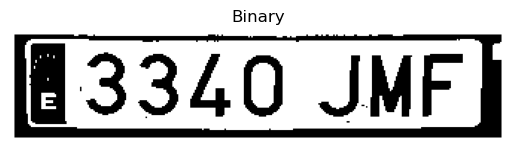

AttributeError: module 'functions_recognition' has no attribute 'visualize_char'

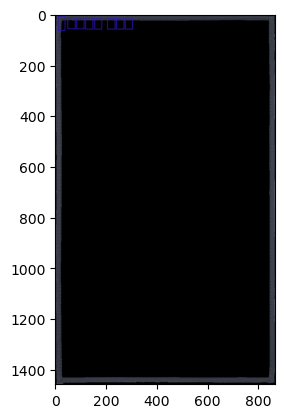

In [28]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
# Define directories for saving Spanish and non-Spanish results
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest"

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        #SAVE CHARACTERS IF WELL-SEGMENTED TO INCREASE THE DATASET (only trainset images)
        #for i in range(len(characters)):
        #save the files to expand the dataset
        #output_path = os.path.join("G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters", f'caracter_{i}.png')
        #cv2.imwrite(output_path, characters[i])
        
        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'results_{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()


## TEST RESULTS

In [ ]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'

for image_file in os.listdir(pc_lara):
        if image_file.endswith(('.jpg')):  # Ensure we're processing image files only
            image_path = os.path.join(pc_lara, image_file)
            image = cv2.imread(image_path)
            car = image.copy()
            
            #SEGMENTATION CHARACTERS------------------------------------------
            #METHOD 1
            m1_chars = r.segment_characters(image)
            r.visualize_char(m1_chars)

            #METHOD 2
            upscaled_license_plate, m2_chars = r.OCR_image(license_plate = image, t = 180 ,min_h = 80, min_w = 20, min_ar = 0.2, max_ar = 1.4, area = 6000)

            #Choose the best method
            best_char = r.best_segmentation_method(m1_chars, m2_chars)

            #PREDICTION MODELS------------------------------------------
            plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)

            label_encoder = LabelEncoder()
            label_encoder.fit(dataset.classes)  
            predicted_plate = cnn.predict_characters(model, best_char, label_encoder)

            license_plate_text = r.easy_ocr_method(upscaled_license_plate)

            spain = input("Is it an Spanish plate?: ")

            if spain == "Y":
                filter_plate_svc = r.filter_spain_plates(plate_sol)
                filter_plate_cnn = r.filter_spain_plates(predicted_plate)
                filter_plate_ocr = r.filter_spain_plates(license_plate_text)

                fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
                
                axes[0].imshow(car, cmap='gray')
                axes[0].set_title(f"Predicted Label (SVM) - TEST: {plate_sol}\nFilter Applied - TEST: {filter_plate_svc}")
                axes[0].axis('off')  

                axes[1].imshow(car, cmap='gray')
                axes[1].set_title(f"Predicted Label (CNN) - TEST: {predicted_plate}\nFilter Applied - TEST: {filter_plate_cnn}")
                axes[1].axis('off')  

                axes[2].imshow(car, cmap='gray')
                axes[2].set_title(f"Predicted Label (EasyOCR) - TEST: {license_plate_text}\nFilter Applied - TEST: {filter_plate_ocr}")
                axes[3].axis('off') 

                plt.tight_layout()
                plt.show()
            else:
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
                
                axes[0].imshow(car, cmap='gray')
                axes[0].set_title(f"Predicted Label (SVM) - TEST: {plate_sol}")
                axes[0].axis('off')  

                axes[1].imshow(car, cmap='gray')
                axes[1].set_title(f"Predicted Label (CNN) - TEST: {predicted_plate}")
                axes[1].axis('off')  

                axes[2].imshow(car, cmap='gray')
                axes[2].set_title(f"Predicted Label (EasyOCR) - TEST: {license_plate_text}")
                axes[3].axis('off') 

                plt.tight_layout()
                plt.show()


## VALIDATION RESULTS

In [ ]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'

for image_file in os.listdir(pc_lara):
        if image_file.endswith(('.jpg')):  # Ensure we're processing image files only
            image_path = os.path.join(pc_lara, image_file)
            image = cv2.imread(image_path)
            car = image.copy()
            
            #SEGMENTATION CHARACTERS------------------------------------------
            #METHOD 1
            m1_chars = r.segment_characters(image)
            r.visualize_char(m1_chars)

            #METHOD 2
            upscaled_license_plate, m2_chars = r.OCR_image(license_plate = image, t = 180 ,min_h = 80, min_w = 20, min_ar = 0.2, max_ar = 1.4, area = 6000)

            #Choose the best method
            best_char = r.best_segmentation_method(m1_chars, m2_chars)

            #PREDICTION MODELS------------------------------------------
            plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)

            label_encoder = LabelEncoder()
            label_encoder.fit(dataset.classes)  
            predicted_plate = cnn.predict_characters(model, best_char, label_encoder)

            license_plate_text = r.easy_ocr_method(upscaled_license_plate)

            spain = input("Is it an Spanish plate?: ")

            if spain == "Y":
                filter_plate_svc = r.filter_spain_plates(plate_sol)
                filter_plate_cnn = r.filter_spain_plates(predicted_plate)
                filter_plate_ocr = r.filter_spain_plates(license_plate_text)

                fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
                
                axes[0].imshow(car, cmap='gray')
                axes[0].set_title(f"Predicted Label (SVM) - VALIDATION: {plate_sol}\nFilter Applied - VALIDATION: {filter_plate_svc}")
                axes[0].axis('off')  

                axes[1].imshow(car, cmap='gray')
                axes[1].set_title(f"Predicted Label (CNN) - VALIDATION: {predicted_plate}\nFilter Applied - VALIDATION: {filter_plate_cnn}")
                axes[1].axis('off')  

                axes[2].imshow(car, cmap='gray')
                axes[2].set_title(f"Predicted Label (EasyOCR) - VALIDATION: {license_plate_text}\nFilter Applied - VALIDATION: {filter_plate_ocr}")
                axes[3].axis('off') 

                plt.tight_layout()
                plt.show()
            else:
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
                
                axes[0].imshow(car, cmap='gray')
                axes[0].set_title(f"Predicted Label (SVM) - VALIDATION: {plate_sol}")
                axes[0].axis('off')  

                axes[1].imshow(car, cmap='gray')
                axes[1].set_title(f"Predicted Label (CNN) - VALIDATION: {predicted_plate}")
                axes[1].axis('off')  

                axes[2].imshow(car, cmap='gray')
                axes[2].set_title(f"Predicted Label (EasyOCR) - VALIDATION: {license_plate_text}")
                axes[3].axis('off') 

                plt.tight_layout()
                plt.show()


# EVALUATING MODELS

In [ ]:
# ADD INFO MERI:) (GRAFS)

# API PART

In [34]:
#api.api_car_model(predicted_plate)

STATE: 200
RESPONSE: <?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><CheckSpainResponse xmlns="http://regcheck.org.uk"><CheckSpainResult><vehicleJson>{
  "Description": "CITROEN C3",
  "CarMake": {
    "CurrentTextValue": "CITROEN"
  },
  "CarModel": {
    "CurrentTextValue": "C3"
  },
  "MakeDescription": {
    "CurrentTextValue": "CITROEN"
  },
  "ModelDescription": {
    "CurrentTextValue": "C3"
  },
  "EngineSize": "1199",
  "VehicleIdentificationNumber": null,
  "RegistrationYear": "2023",
  "RegistrationDate": "15/06/2023",
  "Variation": "1.2 PURETECH 83 FEEL",
  "Seats": null,
  "VariantType": "Gasolina 1199 cc 5 puertas",
  "VehicleType": "Car",
  "Fuel": "Gasolina",
  "IndicativePrice": null,
  "Doors": "5",
  "AllTerain": null,
  "KType": null,
  "ImageUrl": "http://matriculaapi.com/image.aspx/@Q0lUUk9FTiBD

# COUNTER CHARACTERS

In [6]:
path = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters"
output_file = "folder_counts.csv"
r.count_files_in_folders(path, output_file)

Data has been saved to folder_counts.csv
